# **Importing Necessary Libraries**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# **Importing the data**

In [64]:
df=pd.read_csv('Fraud.csv')

In [65]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [66]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## *Identifying Missing Values*

In [68]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [69]:
df['isFlaggedFraud']

,isFlaggedFraud
0,0
1,0
2,0
3,0
4,0
...,...
6362615,0
6362616,0
6362617,0
6362618,0


In [70]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


The last row has Nan values in the 4 columns. Slicing by selecting all the rows except last.


In [71]:
df = df[:-1]

In [72]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


# **Exploratory Data Analysis**

<Axes: xlabel='amount', ylabel='isFraud'>

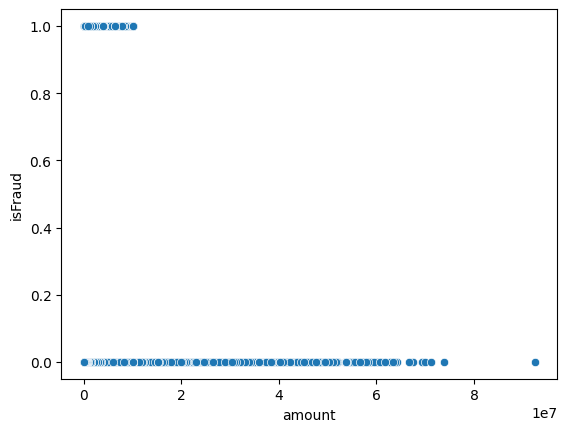

In [73]:
sns.scatterplot(x='amount',y='isFraud',data=df)

<Axes: xlabel='isFraud', ylabel='amount'>

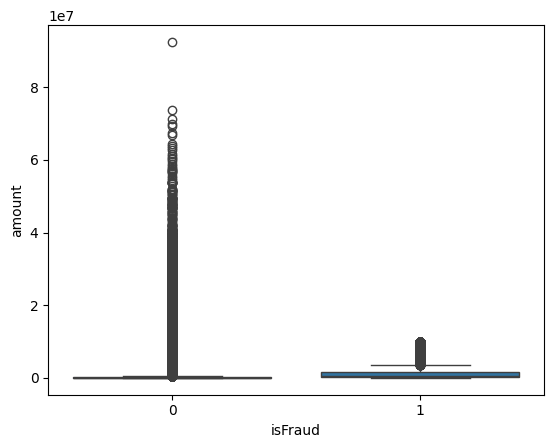

In [74]:
sns.boxplot(x='isFraud',y='amount',data=df)

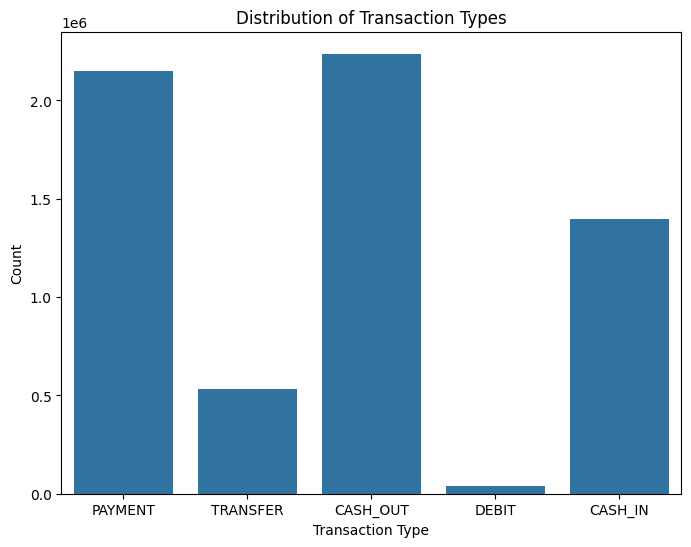

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

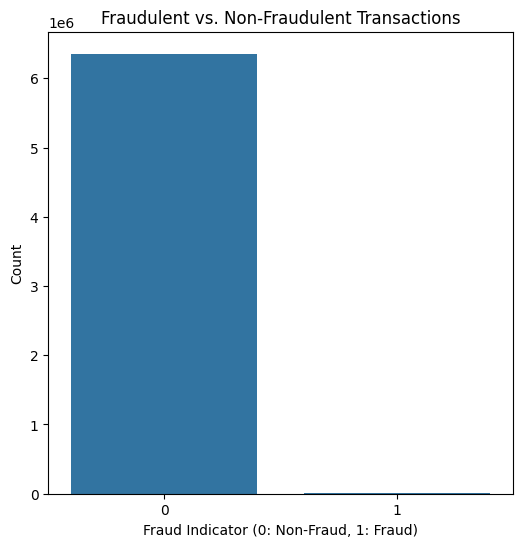

In [76]:
plt.figure(figsize=(6, 6))
sns.countplot(x='isFraud', data=df)
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Fraud Indicator (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()


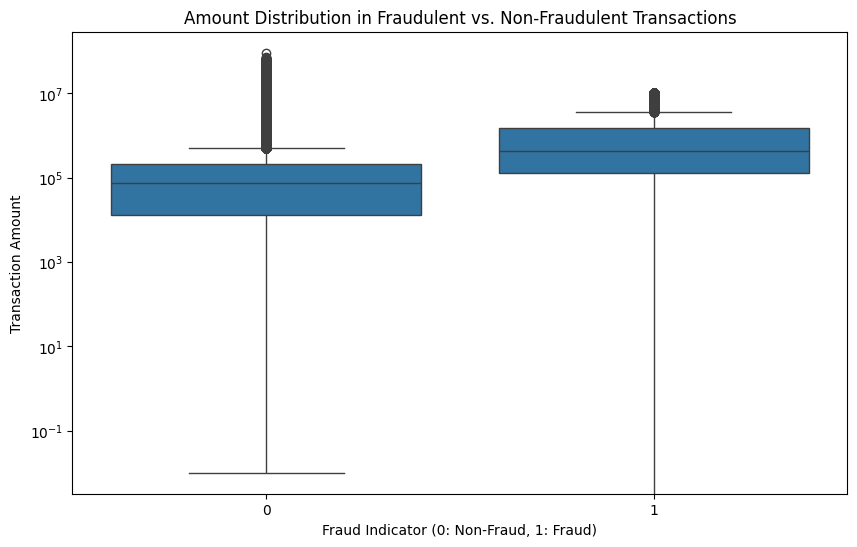

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Amount Distribution in Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Fraud Indicator (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Log scale to handle outliers
plt.show()


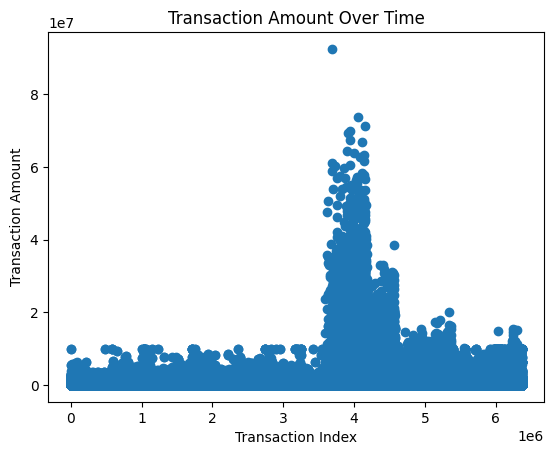

In [78]:
plt.scatter(df.index, df['amount'])
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Over Time')
plt.show()

In [79]:
Q1=df['amount'].quantile(0.25)
Q3=df['amount'].quantile(0.75)
IQR=Q3-Q1

In [80]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df['amount']<lower_bound) | (df['amount']>upper_bound)]
print(outliers)

         step      type      amount     nameOrig  oldbalanceOrg  \
85          1  TRANSFER  1505626.01   C926859124           0.00   
86          1  TRANSFER   554026.99  C1603696865           0.00   
88          1  TRANSFER   761507.39   C412788346           0.00   
89          1  TRANSFER  1429051.47  C1520267010           0.00   
93          1  TRANSFER   583848.46  C1839168128           0.00   
...       ...       ...         ...          ...            ...   
6362612   743  TRANSFER  1258818.82  C1531301470     1258818.82   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
85                  0.0   C665576141        29031.00      5515763.34        0   
86                  0.0   C766572

In [81]:
outliers.shape

(338077, 11)

# **Removing Outliers may make the Model biased.**

In [82]:
new_df=df.copy()
new_df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [83]:
variables=new_df.select_dtypes(include=['object']).columns
variables

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

## **Converting Object datatypes to String using LabelEncoder**

In [84]:
le=LabelEncoder()
for i in variables:
  new_df[i]=le.fit_transform(new_df[i].astype(str))

In [85]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362619 entries, 0 to 6362618
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB


In [86]:
new_df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188997,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002155,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828261,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445980,41554.0,29885.86,828919,0.0,0.0,0,0


# Understanding Correlation among different columns

Text(0.5, 1.0, 'Correlation Matrix')

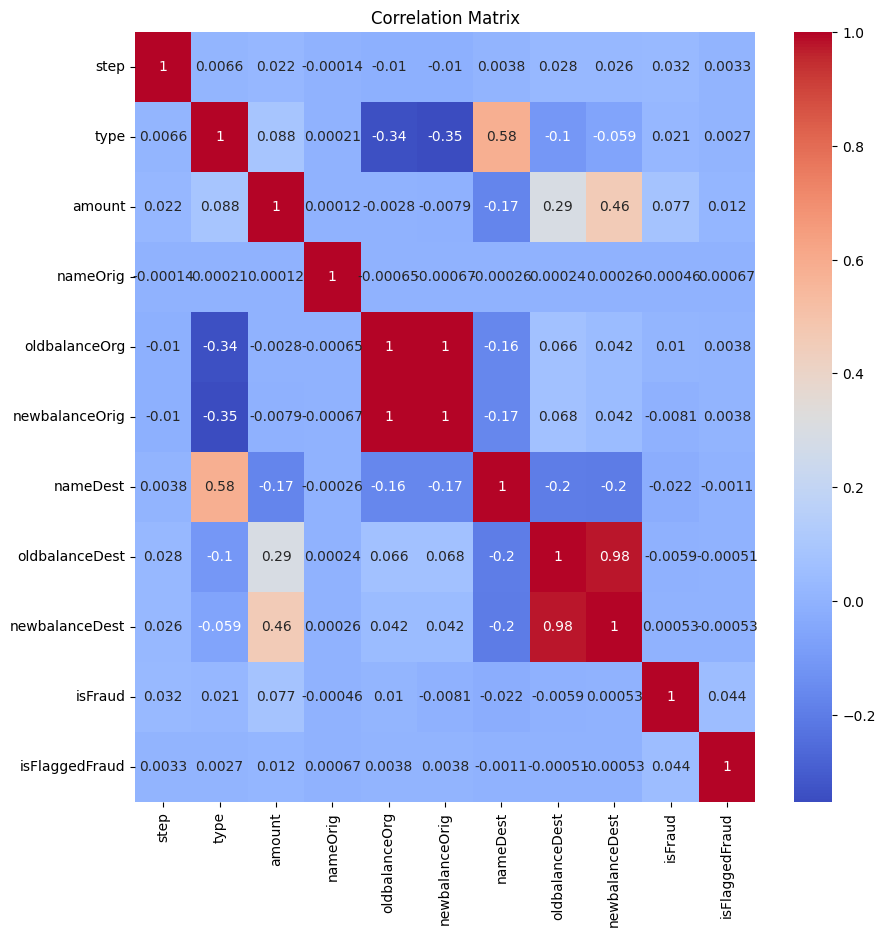

In [87]:
correlation=new_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')

In [88]:
new_df['Amount_Origin']=new_df.apply(lambda x:x['oldbalanceOrg']-x['newbalanceOrig'],axis=1)
new_df['Amount_Dest']=new_df.apply(lambda x:x['oldbalanceDest']-x['newbalanceDest'],axis=1)

new_df=new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest'],axis=1)

In [89]:
new_df.head(5)

,step,type,amount,isFraud,isFlaggedFraud,Amount_Origin,Amount_Dest
0,1,3,9839.64,0,0,9839.64,0.0
1,1,3,1864.28,0,0,1864.28,0.0
2,1,4,181.00,1,0,181.00,0.0
3,1,1,181.00,1,0,181.00,21182.0
4,1,3,11668.14,0,0,11668.14,0.0


# **Importing Necessary libraries for Model Selection**

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# **Normalizing Columns using Standard Scaler**

In [91]:
scaler= StandardScaler()
new_df['Normalized_Amount']=scaler.fit_transform(new_df['amount'].values.reshape(-1,1))
new_df['Normalized_step']=scaler.fit_transform(new_df['step'].values.reshape(-1,1))
new_df['Normalized type']=scaler.fit_transform(new_df['type'].values.reshape(-1,1))
new_df['Normalized Account Orig']=scaler.fit_transform(new_df['Amount_Origin'].values.reshape(-1,1))
new_df['Normalized Account Dest']=scaler.fit_transform(new_df['Amount_Dest'].values.reshape(-1,1))

In [92]:
new_df.drop(['amount','step','type','Amount_Origin','Amount_Dest'],inplace=True,axis=1)
new_df.head(5)

,isFraud,isFlaggedFraud,Normalized_Amount,Normalized_step,Normalized type,Normalized Account Orig,Normalized Account Dest
0,0,0,-0.281560,-1.703043,0.952399,0.211878,0.152895
1,0,0,-0.294767,-1.703043,0.952399,0.157491,0.152895
2,1,0,-0.297555,-1.703043,1.693076,0.146013,0.152895
3,1,0,-0.297555,-1.703043,-0.528954,0.146013,0.178951
4,0,0,-0.278532,-1.703043,0.952399,0.224347,0.152895


In [93]:
Y=new_df['isFraud']
X=new_df.drop(['isFraud'],axis=1)

# **Spliting the Dataset**

In [94]:
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.2,random_state=22)
X_train.shape
X_test.shape

(1272524, 6)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

log_reg=LogisticRegression(C=0.001,penalty="l2")
log_reg.fit(X_train,Y_train)

y_pred=log_reg.predict(X_test)
logic_regression_score=log_reg.score(X_test,Y_test)*100

In [96]:
decision_tree=DecisionTreeClassifier(max_depth=80,min_samples_split=2,min_samples_leaf=1)
decision_tree.fit(X_train, Y_train)

Y_pred_dt=decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test,Y_test)*100

In [97]:
print("Decision Tree Score:",decision_tree_score)
print("Logistic Regression Score",logic_regression_score)

Decision Tree Score: 99.94947050114575
Logistic Regression Score 99.9136362064684


# **Model Evaluation**

In [98]:
import itertools
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.81      0.79      0.80      1641

    accuracy                           1.00   1272524
   macro avg       0.91      0.89      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion matrix for Decision Tree


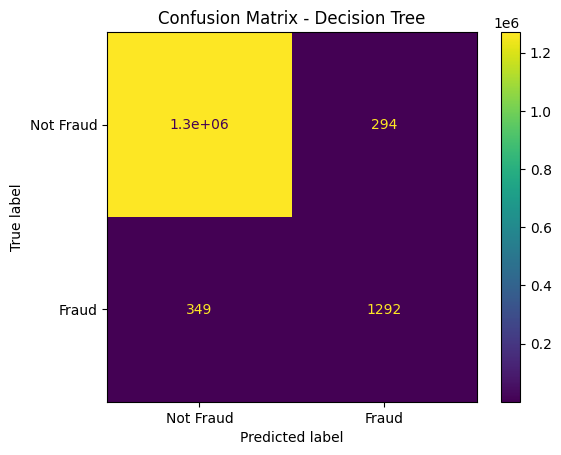

In [99]:
classification_report_dt=classification_report(Y_test,Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

confusion_matrix_dt=confusion_matrix(Y_test,Y_pred_dt.round())
print('Confusion matrix for Decision Tree')
display_label=['Not Fraud','Fraud']
matrix= ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt,display_labels=display_label)
matrix.plot()
plt.title('Confusion Matrix - Decision Tree')
plt.show()

precision_decision_tree=precision_score(Y_test,Y_pred_dt)
recall_decision_tree=recall_score(Y_test,Y_pred_dt)

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.88      0.38      0.53      1641

    accuracy                           1.00   1272524
   macro avg       0.94      0.69      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion matrix for Logistic Regression


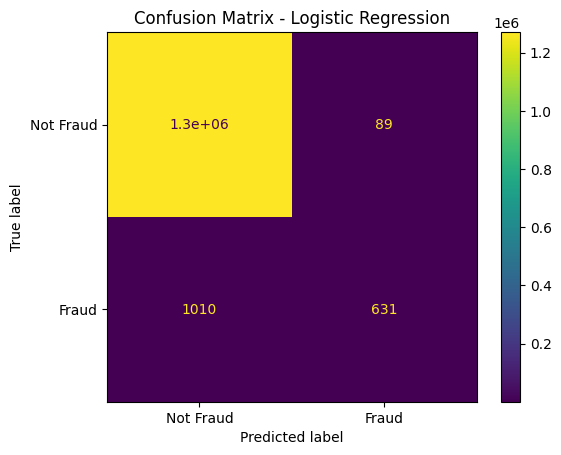

In [100]:
classification_report_lr=classification_report(Y_test,y_pred)
print("Classification Report - Logistic Regression")
print(classification_report_lr)

confusion_matrix_lr=confusion_matrix(Y_test,y_pred.round())
print('Confusion matrix for Logistic Regression')
display_label=['Not Fraud','Fraud']
matrix= ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr,display_labels=display_label)
matrix.plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

precision_logistic_regression=precision_score(Y_test,y_pred)
recall_logistic_regression=recall_score(Y_test,y_pred)